<a href="https://colab.research.google.com/github/yuva1111/Medical_insurance/blob/main/medical_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data=pd.read_csv('insurance.csv')

In [39]:
data.shape

(1338, 7)

In [40]:
columns=data.columns
columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [41]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [42]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

It is clearly seen that our dataset doesnot contain null values

In [43]:
types=dict(data.dtypes)
types

{'age': dtype('int64'),
 'bmi': dtype('float64'),
 'charges': dtype('float64'),
 'children': dtype('int64'),
 'region': dtype('O'),
 'sex': dtype('O'),
 'smoker': dtype('O')}

Dataset has 4 Numerical variables and 3 categorical variables

In [44]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


Now let explore each categorical variable

In [46]:
categories=[]
for col in columns:
  if types[col]=='object':
    categories.append(col)
categories    

['sex', 'smoker', 'region']

In [47]:
for col in categories:
  print(col,":")
  print(data[col].unique())
  print(data.groupby(col).bmi.count())
  print("=================================")

sex :
['female' 'male']
sex
female    662
male      676
Name: bmi, dtype: int64
smoker :
['yes' 'no']
smoker
no     1064
yes     274
Name: bmi, dtype: int64
region :
['southwest' 'southeast' 'northwest' 'northeast']
region
northeast    324
northwest    325
southeast    364
southwest    325
Name: bmi, dtype: int64


###Feature Engineering and Data Visualization

Text(0, 0.5, 'Frequency')

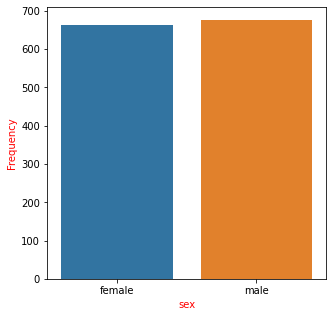

In [48]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x="sex")
plt.xlabel("sex",size=10,c="r")
plt.ylabel("Frequency",size=10,c="r")

Text(0, 0.5, 'Frequency')

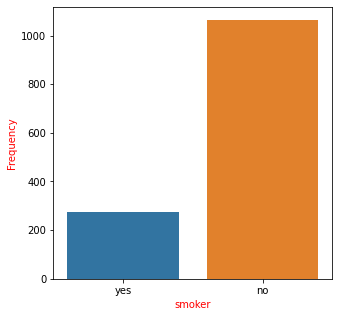

In [49]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x="smoker")
plt.xlabel("smoker",size=10,c="r")
plt.ylabel("Frequency",size=10,c="r")

Text(0, 0.5, 'Frequency')

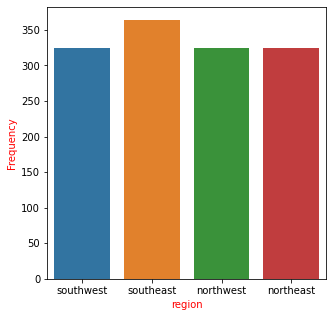

In [50]:
plt.figure(figsize=(5,5))
sns.countplot(data=data,x="region")
plt.xlabel("region",size=10,c="r")
plt.ylabel("Frequency",size=10,c="r")

Text(0, 0.5, 'charges')

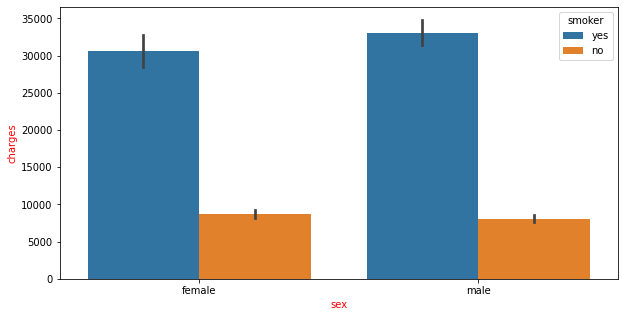

In [53]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,y='charges',x='sex',hue='smoker')
plt.xlabel("sex",size=10,c="r")
plt.ylabel("charges",size=10,c="r")

Text(0, 0.5, 'charges')

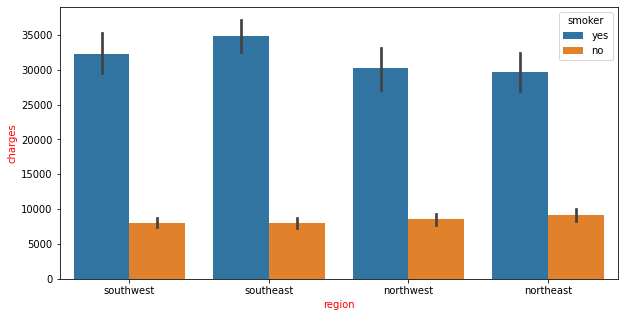

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,y='charges',x='region',hue='smoker')
plt.xlabel("region",size=10,c="r")
plt.ylabel("charges",size=10,c="r")

Text(0, 0.5, 'charges')

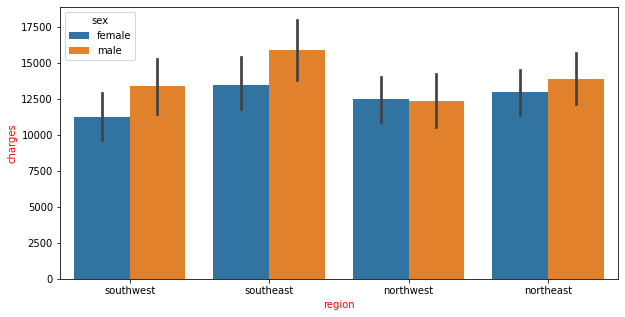

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,y='charges',x='region',hue='sex')
plt.xlabel("region",size=10,c="r")
plt.ylabel("charges",size=10,c="r")

###outlier checking  using box plots

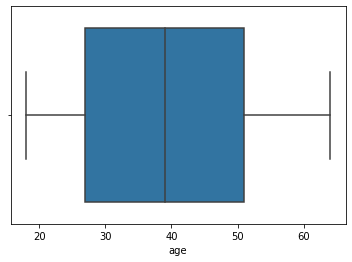

In [56]:
sns.boxplot(x='age',data=data)

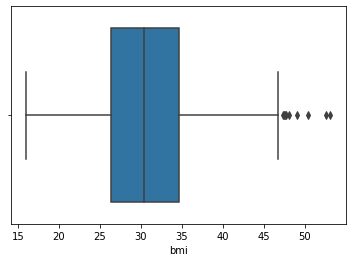

In [57]:
sns.boxplot(x='bmi',data=data)

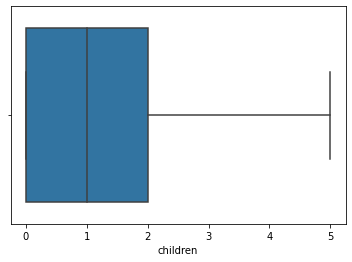

In [58]:
sns.boxplot(x='children',data=data)

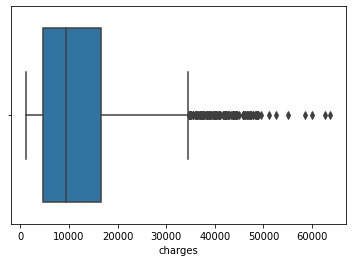

In [59]:
sns.boxplot(x='charges',data=data)

#####checking for the target distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


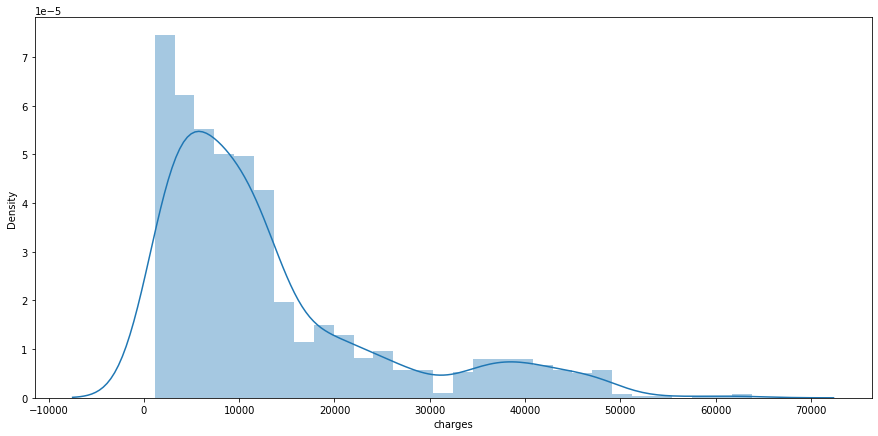

In [64]:
plt.figure(figsize=(15,7))
sns.distplot(data['charges'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


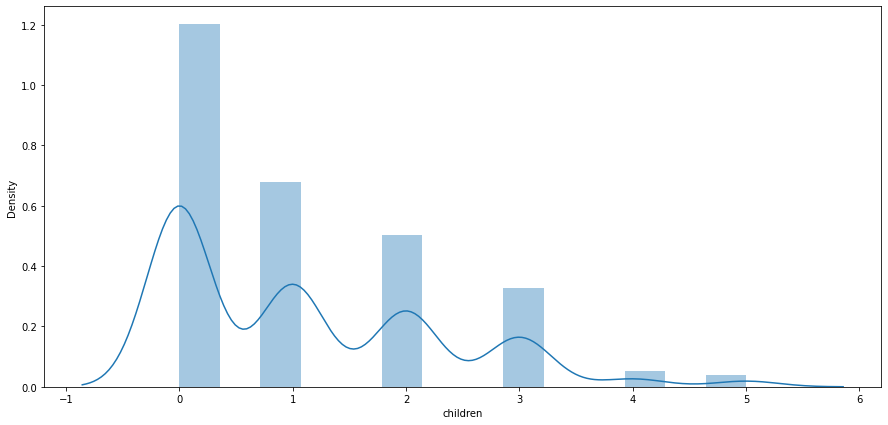

In [65]:
plt.figure(figsize=(15,7))
sns.distplot(data['children'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


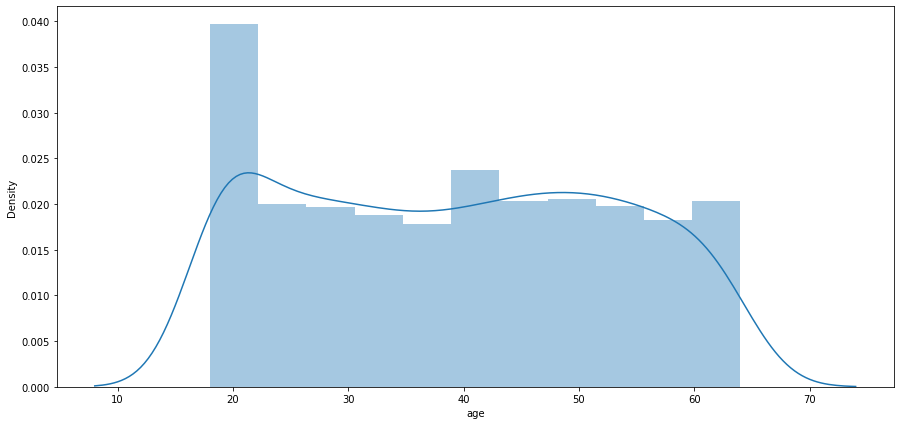

In [66]:
plt.figure(figsize=(15,7))
sns.distplot(data['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


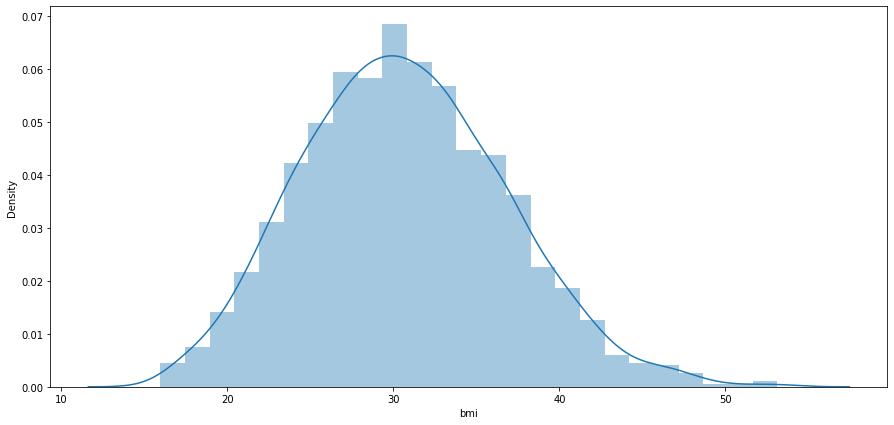

In [67]:
plt.figure(figsize=(15,7))
sns.distplot(data['bmi'])